In [1]:
import pandas as pd
from sklearn.metrics import adjusted_rand_score

In [71]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [41]:
df = pd.read_csv("/Users/zemp/phd/scilife/mskcc_data/ov2295/ov2295_cell_cn.csv")
df.head()

,cell_id,sample_id,library_id,chr,start,end,reads,copy,state
0,SA922-A90554B-R34-C70,SA922,A90554B,1,1,500000,13,NaN,6
1,SA922-A90554B-R34-C70,SA922,A90554B,1,500001,1000000,442,NaN,6
2,SA922-A90554B-R34-C70,SA922,A90554B,1,1000001,1500000,461,6.672340,6
3,SA922-A90554B-R34-C70,SA922,A90554B,1,1500001,2000000,478,5.211916,6
4,SA922-A90554B-R34-C70,SA922,A90554B,1,2000001,2500000,594,8.384862,6


In [42]:
df['cell_id'].unique().shape

(1966,)

In [43]:
clones = pd.read_csv("/Users/zemp/phd/scilife/mskcc_data/ov2295/ov2295_clone_clusters.csv")

In [44]:
clones['clone_id'].unique()

array(['C', 'D', 'A', 'B', 'I', 'H', 'G', 'E', 'F'], dtype=object)

In [76]:
# join by cell_id
clones['cell'] = clones['cell_id'].rank(method='dense', ascending=True).astype(int) - 1
clones['clone'] = clones['clone_id'].rank(method='dense', ascending=True).astype(int) - 1
joined_df = pd.merge(clones, df, on = 'cell_id', how='left')
joined_df_ca = joined_df[['cell', 'clone']].dropna().drop_duplicates().astype(int)
joined_df_ca.shape

(891, 2)

In [77]:
joined_df_ca.head()

,cell,clone
0,0,2
6206,1,2
12412,5,2
18618,8,2
24824,10,2


In [78]:
joined_df_ca['cell'].min()

0

<AxesSubplot:>

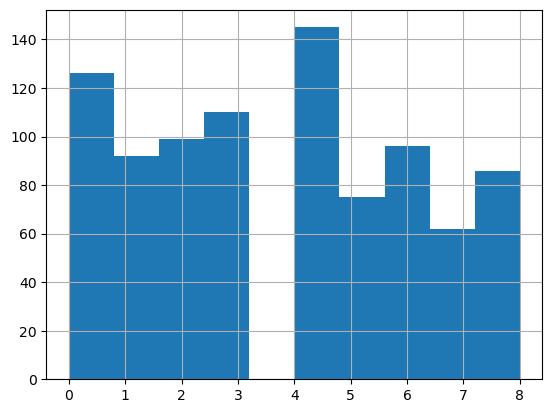

In [79]:
joined_df_ca['clone'].hist()

In [80]:
joined_df_ca['cell'].unique().shape

(891,)

<AxesSubplot:>

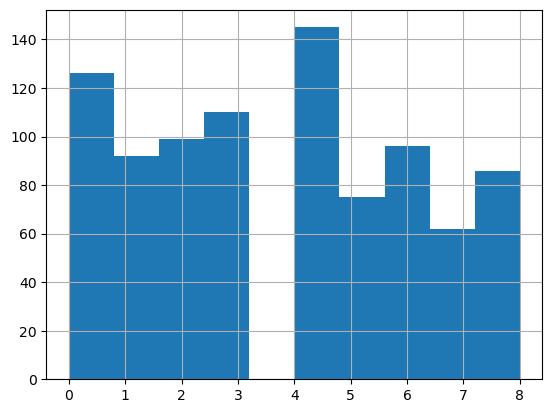

In [81]:
joined_df_ca['clone'].hist()

In [73]:
import h5py

h5f = h5py.File("/Users/zemp/phd/scilife/cpt_experiments/configs/ov2295_1chr/real_k9_lp/checkpoint_k9a7n1966m499.h5")

In [87]:
import numpy as np
cell_assignment = h5f['qZ']['pi'][-1, ...].argmax(axis=1)
cell_probs_full = h5f['qZ']['pi'][-1, ...]
cell_probs = cell_probs_full[joined_df_ca['cell'], :]

In [92]:
from utils.evaluation import best_mapping

mapp = best_mapping(joined_df_ca['clone'].to_numpy(), cell_probs)

In [96]:
K = len(joined_df_ca['clone'].unique())
one_hot_gt = np.eye(K)[joined_df_ca['clone'].to_numpy()]
one_hot_gt.shape

(891, 9)

In [97]:
joined_df_ca['clone'][:10]

0        2
6206     2
12412    2
18618    2
24824    2
31030    2
37236    2
43442    2
49648    2
55854    2
Name: clone, dtype: int64

In [99]:
(cell_probs * one_hot_gt[:, mapp]).sum() / 891

0.1537660173961514

In [66]:
viz = cell_assignment[joined_df_ca['cell']]

In [67]:
viz.shape

(891,)

In [68]:
adjusted_rand_score(joined_df_ca['clone'], viz)

-0.00042940743985863994

<AxesSubplot:>

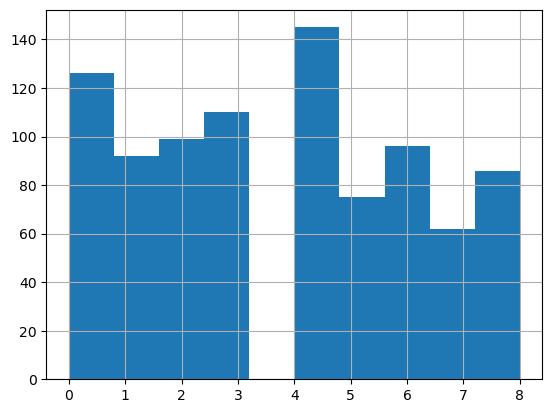

In [15]:
joined_df_ca['clone'].hist()

In [16]:
viz_df = pd.DataFrame({'clone': viz})

<AxesSubplot:>

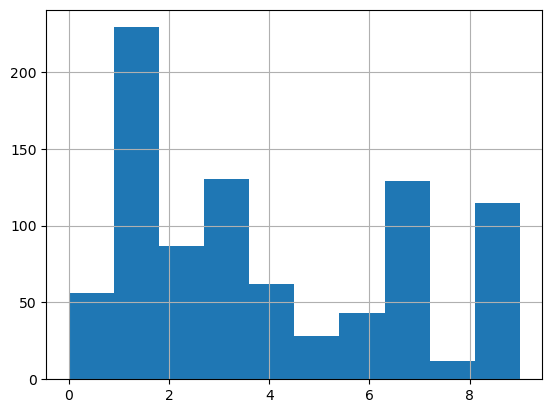

In [17]:
viz_df['clone'].hist()